# Student Performans Analysis #
### This is the final project required for data science nanodegree by GA & Misk Academy ###

---

Dataset available at : https://archive.ics.uci.edu/ml/datasets/student+performance

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as _math

sns.set_style("white")


In [115]:
#Contents auto-fit
#pd.set_option('display.max_colwidth', 0)
#pd.set_option("display.max_columns",None)
#pd.options.display.max_rows = 4000
pd.option_context('display.precision', 2)

# threshold of sccess variable
pass_score=10

## 1. Loading Dataset 

In [116]:
# load data files into data frame objects

math=pd.read_csv("./data/student-mat.csv",delimiter=";")
por=pd.read_csv("./data/student-por.csv",delimiter=";")
math['course']="math"
por['course']="por"
dictionary=pd.read_excel("./data/dictionary.xlsx")
#merging data frams into one data fram
students=pd.concat([math,por],ignore_index = True)

#### - Data Dictionary : 

In [117]:
dictionary

,Variable,New Name,Description,Encoding
0,school,school,student's school (binary: 'GP' - Gabriel Perei...,"{""MS"":1,""GP"":2}"
1,sex,gender,student's sex (binary: 'F' - female or 'M' - m...,"{""M"":1,""F"":0}"
2,age,age,student's age (numeric: from 15 to 22),NaN
3,address,address,student's home address type (binary: 'U' - urb...,"{""U"":1,""R"":0}"
4,famsize,family_size,family size (binary: 'LE3' - less or equal to ...,"{""GT3"":1,""LE3"":0}"
5,Pstatus,parents_status,parent's cohabitation status (binary: 'T' - li...,"{""T"":1,""A"":0}"
6,Medu,mother_education,"mother's education (numeric: 0 - none, 1 - pri...",NaN
7,Fedu,father_education,"father's education (numeric: 0 - none, 1 - pri...",NaN
8,Mjob,mother_job,"mother's job (nominal: 'teacher', 'health' car...","{'services':1, 'at_home':2, 'teacher':3, 'heal..."
9,Fjob,father_job,"father's job (nominal: 'teacher', 'health' car...","{'services':1, 'at_home':2, 'teacher':3, 'heal..."


#### Custom Functions

In [118]:
# This function takes a column name as a parameter
# and returns a data frame with maximum and minimum value
# of a given column name associeted with a its row values
def min_max_value(col):
    top_index=students[col].idxmax()
    top_value=students["final_score"].max()
    d={top_value : students.loc[top_index] }
    top_obs=pd.DataFrame(data=d)
    
    bottom_index=students[col].idxmin()
    bottom_value=students["final_score"].min()
    d={bottom_value : students.loc[bottom_index]}
    bot_obs=pd.DataFrame(data=d)
    
    min_max_obs=pd.concat([top_obs,bot_obs],axis=1)
    
    return min_max_obs

In [119]:
# The plotting function below takes takes two arguments, the name of the column and the data associated with that column.
# I would call it repeatedly to plot some of variable distibutions. 
def distribution_plotter(column, data_set,x,y):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (x, y)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

In [120]:
def get_scores(y_true, y_hat):
    scores = {
        "MSE":   round(metrics.mean_squared_error(y_true, y_hat), 3),
        "MAE":   round(metrics.mean_absolute_error(y_true, y_hat), 3),
        "MedAE": round(metrics.median_absolute_error(y_true, y_hat), 3),
        "RMSE":  round(metrics.mean_squared_error(y_true, y_hat) ** 0.5, 3),
        "R2":    round(metrics.r2_score(y_true, y_hat), 3),
        }
    return scores

---

## 2. Exploratory Data Analysis (EDA)

- Before any analysis step, i would prefer to change column labels to more descriptive names (as shown in dictionary):

In [121]:
students.columns = ['school','gender','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score','course']

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p><b><span style="color:blue">&nbsp; How many rows and columns is there ? </span></b></p>

In [122]:
print("Rows: {}".format(students.shape[0]), "\nColumns: {}".format(students.shape[1]))

Rows: 1044 
Columns: 34


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; What is the data types of columns? </span></b></p>

In [123]:
students.dtypes.value_counts()

object    18
int64     16
dtype: int64

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; What is the meta data of the dataset? </span></b></p>

In [124]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   gender                 1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support       

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Is there any missing values? </span></b></p>

In [125]:
students.isnull().sum().sum()

0

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Is there any row duplications? </span></b></p>

In [126]:
students.duplicated().sum()

0

<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">
<b><span style="color:brown">&nbsp; No missing values, No duplications, Great ! </span></b>

---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; List statistical summary of numerical data ? </span></b></p>

In [127]:
students.describe().T.style

,count,mean,std,min,25%,50%,75%,max
age,1044.000000,16.726054,1.239975,15.000000,16.000000,17.000000,18.000000,22.000000
mother_education,1044.000000,2.603448,1.124907,0.000000,2.000000,3.000000,4.000000,4.000000
father_education,1044.000000,2.387931,1.099938,0.000000,1.000000,2.000000,3.000000,4.000000
commute_time,1044.000000,1.522989,0.731727,1.000000,1.000000,1.000000,2.000000,4.000000
study_time,1044.000000,1.970307,0.834353,1.000000,1.000000,2.000000,2.000000,4.000000
failures,1044.000000,0.264368,0.656142,0.000000,0.000000,0.000000,0.000000,3.000000
family_quality,1044.000000,3.935824,0.933401,1.000000,4.000000,4.000000,5.000000,5.000000
free_time,1044.000000,3.201149,1.031507,1.000000,3.000000,3.000000,4.000000,5.000000
go_out,1044.000000,3.156130,1.152575,1.000000,2.000000,3.000000,4.000000,5.000000
weekday_alcohol_usage,1044.000000,1.494253,0.911714,1.000000,1.000000,1.000000,2.000000,5.000000


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; List statistical summary of categorical/textual data ? </span></b></p>

In [128]:
students.describe(include=['object']).T.style

,count,unique,top,freq
school,1044,2,GP,772
gender,1044,2,F,591
address,1044,2,U,759
family_size,1044,2,GT3,738
parents_status,1044,2,T,923
mother_job,1044,5,other,399
father_job,1044,5,other,584
reason,1044,4,course,430
guardian,1044,3,mother,728
school_support,1044,2,no,925


<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
   
   - It is noticeable that there are students who scored zero in the final exam!
   - 50% of students have scored 11 -and lower- of 20.
   - It seems there are outliers in absences variable. </span>
---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; How many students got (Zero) score on final exam ? </span></b></p>

In [129]:
students[students['final_score'] == 0]["final_score"].count()

53

<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><span style="color:brown">
    
   - **Potential outliers**
       - For students who scored zero in the final exam, we do not have definite information as to whether these are real scores or are  parameter values for a reason, such as not taking the final exam.
       - It is possible that the source data editor imputed missing values with zero for statistical reasons.
  
    
   - **Addressing the problem**
   - To address these values, we will suggest two assumptions:
     1. The zero values recorded in the final exam are the real grades of students who have already taken the exam.
     2. The zero values recorded in the final exam are numbers that have been imputed for as a result of students not attending the final exam.
    
    
   - As a result we will handle with all possible scenarios, thuse we create a three data frames:
     1. **students** : Keeping zero values as they are 
     2. **imputed_students** : Imputing zero values with the mean of non-zero final scores
     3. **dropped_students** : Dropping zero values.</span>
    
    
---

we will resume EDA process on **students** data frame, and keep the other two frame to use later on in modeling process.

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Statistically, descripe students who take 0 in final exam ? </span></b></p>

In [130]:
students[students['final_score'] == 0].describe()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.0
mean,17.283019,2.301887,2.113208,1.660377,1.830189,0.886792,3.849057,3.245283,3.169811,1.490566,2.132075,3.660377,0.0,7.396226,4.415094,0.0
std,1.246184,1.066715,1.068075,0.758120,0.848887,1.012620,1.098885,0.958879,1.410617,0.799583,1.256334,1.300050,0.0,1.801064,3.707757,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,4.000000,0.000000,0.0
25%,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.0,6.000000,0.000000,0.0
50%,18.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.0,7.000000,5.000000,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,0.0,8.000000,8.000000,0.0
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.0,12.000000,10.000000,0.0


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;Who is the top ten percent of students performing in the final exam?? </span></b></p>

In [131]:
Top_10_perc = students.sort_values(by="final_score",ascending=False).head(int(round((students["age"].count())) * .10))
Top_10_perc

,school,gender,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,course
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,1,1,2,4,19,19,20,math
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,3,3,1,2,2,5,18,18,19,math
374,MS,F,18,R,LE3,T,4,4,other,other,...,4,4,1,1,1,0,19,18,19,math
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,5,2,1,1,3,10,18,19,19,math
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,3,1,1,4,6,18,19,19,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,GP,F,15,R,LE3,T,3,1,other,other,...,4,2,2,3,3,12,16,16,16,math
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,...,4,2,2,2,1,5,16,15,16,math
596,GP,M,16,U,LE3,T,2,1,other,other,...,2,3,1,2,5,0,13,14,16,por
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,math



<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;What is the main statistical characteristics of top ten percent of students performing in the final exam?</span></b></p>

In [132]:
Top_10_perc.describe(include="all").T.style

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,104,2,GP,83,nan,nan,nan,nan,nan,nan,nan
gender,104,2,F,62,nan,nan,nan,nan,nan,nan,nan
age,104.000000,nan,nan,nan,16.634615,1.061760,15.000000,16.000000,17.000000,17.000000,20.000000
address,104,2,U,82,nan,nan,nan,nan,nan,nan,nan
family_size,104,2,GT3,68,nan,nan,nan,nan,nan,nan,nan
parents_status,104,2,T,91,nan,nan,nan,nan,nan,nan,nan
mother_education,104.000000,nan,nan,nan,3.221154,0.964986,1.000000,3.000000,4.000000,4.000000,4.000000
father_education,104.000000,nan,nan,nan,2.701923,1.156491,0.000000,2.000000,3.000000,4.000000,4.000000
mother_job,104,5,services,32,nan,nan,nan,nan,nan,nan,nan
father_job,104,5,other,48,nan,nan,nan,nan,nan,nan,nan



 
 <img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
   - Notes on the top 10 percent of students : 
 - More than 50 percent of students are female
 - More than 85 percent of students live with their parents
 - Almost 75 percent of students do not have emotional relationships
 - All of students wants to take higher education 
 - Almost 99 percent of student did not get extra educational support </span>

---



<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;Do males doing better than females in final exam?</span></b></p>

In [133]:
students.groupby('gender').final_score.mean()

gender
F    11.448393
M    11.203091
Name: final_score, dtype: float64

 <img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
   - Females scored bit hieghr than males In average . </span>

---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Comparing students performance among two schools ,by gender:</span></b></p>

In [134]:
 pd.crosstab([students.gender],students.school,values=students["final_score"],aggfunc="mean",margins=True)
    

school,GP,MS,All
gender,,,
F,11.683333,10.871345,11.448393
M,11.573864,9.910891,11.203091
All,11.633420,10.514706,11.341954


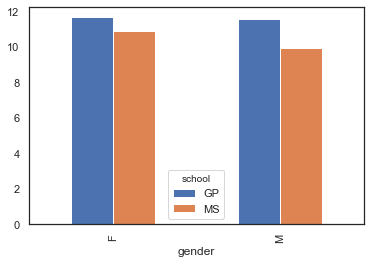

In [135]:
 pd.crosstab([students.gender],students.school,values=students["final_score"],aggfunc="mean").plot(kind="bar")
    

<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
  - From above table we can see that GP students performed better than MS students. </span>

---

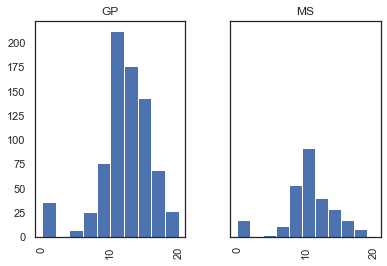

In [136]:
plt.size=(3,3)
students.hist(column='final_score', by='school',sharex=True, sharey=True);

---


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;How students ages are distriputed ?</span></b></p>

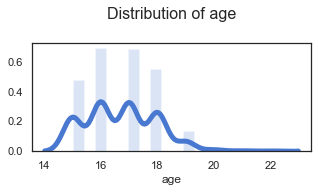

In [137]:
distribution_plotter("age", students,5,2) 



<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; For each age, how many students? and what is the mean and median of there final score ?</span></b></p>

In [138]:
students.groupby(['age','gender']).final_score.agg(["count","mean","median"])

count       mean  median
age gender                          
15  F          95  11.021053    11.0
    M          99  12.444444    12.0
16  F         159  11.779874    12.0
    M         122  11.450820    11.5
17  F         171  12.070175    12.0
    M         106  10.745283    10.0
18  F         127  11.125984    11.0
    M          95  10.715789    11.0
19  F          33   8.939394    10.0
    M          23   9.000000    10.0
20  F           5  12.400000    12.0
    M           4  13.000000    12.5
21  F           1  12.000000    12.0
    M           2   8.500000     8.5
22  M           2   6.500000     6.5


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;Who is the best and lowest performing among students</span></b></p>

In [139]:
 min_max_value("final_score")

,20,0
school,GP,GP
gender,M,M
age,16,18
address,U,R
family_size,GT3,GT3
parents_status,T,T
mother_education,4,2
father_education,3,2
mother_job,health,services
father_job,services,other


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; How final scores are disriputed ?</span></b></p>

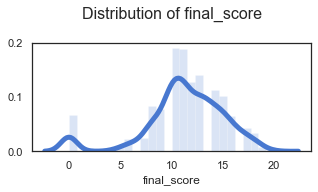

In [140]:
distribution_plotter("final_score", students,5,2)

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; What is the relationship between period1_score and period2_score ?</span></b></p>

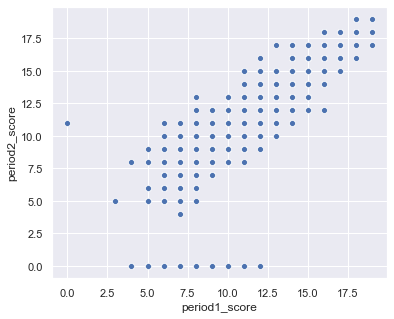

In [141]:
sns.set(rc={"figure.figsize": (6, 5)})

ax=sns.scatterplot(x="period1_score", y="period2_score",data=students)


<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
- There is a positive linear relationship between *period1_score* and *period2_score*. </span>
---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Is there a correlation among the columns in the dataframe using ‘Pearson’ method. ? </span></b></p>

In [142]:
students.corr(method ='pearson')

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
mother_education,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
father_education,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
commute_time,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
study_time,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
family_quality,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
free_time,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
go_out,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
weekday_alcohol_usage,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


## 2.Features Engineering


### - How independant variables are correlated with each other ?

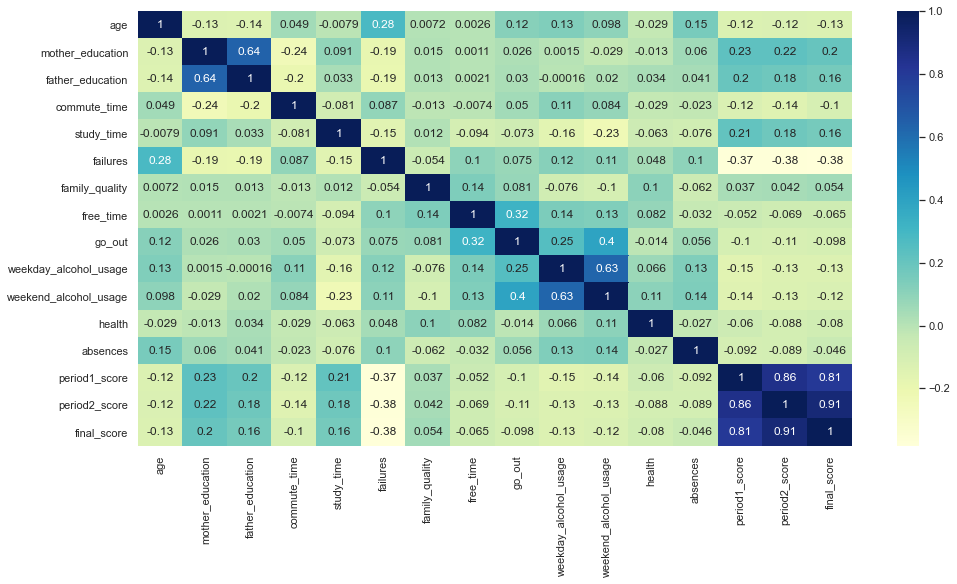

In [143]:
sns.set(rc={"figure.figsize": (16, 8)})
sns.heatmap(students.corr(),annot=True,cmap='YlGnBu')

### Discussing independant variables correlations:

- It is noticeable by looking at correlation matrix above that there are some independant variables linked to each other by more than %50 , keeping them together in the model might decrease the model performance and effect its ability to  predict correctly. 

- This issue of correlation called **collinearity**

#### The correlations have been located in a dataset: 
- **Correlation 1 :** period1_score <--> period2_score
- **Correlation 2 :** mother_education <--> father_education
- **Correlation 3 :** weekday_alcohol_usage <--> weekend_alcohol_usage
    

-  To solve correlation isuue I will delete one variable from each pair of correlated variables, the lower correlated variabled with a target is a good candidate to delete. 


- Let's take a clear look at the correlations of independant variables with the target variable:

In [144]:
df=students[["mother_education", "father_education","weekday_alcohol_usage","weekend_alcohol_usage", \
          "period1_score","period2_score","final_score"]].corr()
df=df.loc[:,["final_score"]]
df.style.bar(subset=['final_score'], align='mid', color=['#d65f5f', '#5fba7d'])


,final_score
mother_education,0.201472
father_education,0.159796
weekday_alcohol_usage,-0.129642
weekend_alcohol_usage,-0.115740
period1_score,0.809142
period2_score,0.910743
final_score,1.000000


[Styling — pandas 1.0.3 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

- According to values of correlations for each pair of variable with a target variable, Below is a list of what variables will be deleted and preserved:
    - mother_education
    - ~father_education~

    - weekday_alcohol_usage
    - ~weekend_alcohol_usage~

    - ~period1_score~
    - period2_score

In [145]:
students.drop(columns=["father_education","weekend_alcohol_usage","period1_score"],inplace=True)

---

- For modeling process, all categorical values must be converted to numerical, because scikit-learn expects all features to be  numeric

- For **Ordered categories** i will left them as they are, because they have already encoded with sensible numeric values 
- For **Unordered categories** i will use dummy encoding (0/1). Here, each possible category would become a separate feature.

What are the Ordered categories and Unordered categories features in our data set?
- to programatically retrieve feasures based on there type i used Python code: 
 - **Unordered categories:** 
    <code>dictionary[pd.notna(dictionary["Encoding"])]["New Name"]</code>
 - **Ordered categories:** <code>[students[students.columns.difference(dummies)] </code>


1.filter the data dictionary to get only the nominal feature names (unordered categories) that needs to be dummied

In [146]:
unordered=dictionary[pd.notna(dictionary["Encoding"])]["New Name"]
dummies=pd.get_dummies(students[unordered],drop_first=True)


2.Concatenate data frame of dummies with  ordered categories of original data fram .

In [147]:
students_dummies = pd.concat([students[students.columns.difference(unordered)], dummies], axis=1)

### - How dependant variable **final_score** is correlated with independant variables?

In [148]:
students.corr()["final_score"]

age                     -0.125282
mother_education         0.201472
commute_time            -0.102627
study_time               0.161629
failures                -0.383145
family_quality           0.054461
free_time               -0.064890
go_out                  -0.097877
weekday_alcohol_usage   -0.129642
health                  -0.080079
absences                -0.045671
period2_score            0.910743
final_score              1.000000
Name: final_score, dtype: float64

- I will select the most 10 correlated predictors with target variable

In [149]:
#most_correlated = students_dummies.corr().abs()['final_score'].sort_values(ascending=False)
#most_correlated = most_correlated[:12]

- Now that we have the most correlated variables names, we need to subset or data frame -**students_dummies**- so it only include the most correlated variables with the target variable:

In [150]:
#students_dummies = students_dummies.loc[:, most_correlated.index]
#students_dummies

- **Now that the data is prepared, it's time for modeling.**

---

### Feature selection method: SelectKBest

- Score function: f_regression 

In [151]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
f = students_dummies[students_dummies.columns.difference(["final_score"])]
t = students_dummies["final_score"]
selector = SelectKBest(f_regression, k=8)
selector.fit(f, t)

SelectKBest(k=8, score_func=<function f_regression at 0x1646FFA8>)

### Get columns to keep and create new dataframe with those only

In [152]:
most_import_cols = selector.get_support(indices=True)
f.iloc[:,most_import_cols]

,course_por,desire_higher_edu_yes,failures,mother_education,period2_score,school_MS,study_time,weekday_alcohol_usage
0,0,1,0,4,6,0,2,1
1,0,1,0,1,5,0,2,1
2,0,1,3,1,8,0,2,2
3,0,1,0,4,14,0,3,1
4,0,1,0,3,10,0,2,1
...,...,...,...,...,...,...,...,...
1039,1,1,1,2,11,1,3,1
1040,1,1,0,3,15,1,2,1
1041,1,1,0,1,12,1,2,1
1042,1,1,0,3,10,1,1,3


#### From the above we see that the best eight predictors for final score:
	
- course_por	
- desire_higher_edu_yes	
- failures	
- mother_education	
- period2_score	
- school_MS	
- study_time	
- weekday_alcohol_usage

#### Preparing the final version of data set to use it in modeling process:

In [39]:
X_features=f.iloc[:,most_import_cols]
y_target = t
students_final=pd.concat([X_features,y_target],axis=1)

# 3.Modeling Process

  - I will build two models:
    - **1. Linear Regression:**
        The model will predict the student’s final score
    - **2. Logistic Regression:** 
        The model will predict whether the student is likely to pass the final exam or not.
        

## 1.Linear Regression

**Step 1:** Import the required class.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,HuberRegressor,LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

**Step 2:**  Create a feature matrix called "X" with selected independent variable, and series called "y" that has the **final_score** column
  

In [41]:
X = students_final[students_final.columns.difference(["final_score"])]
y = students_final.final_score

**Step 3:** Instantiate the estimator

In [42]:
linreg = LinearRegression()

**Step 4:** Fit the estimator

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
linreg.fit(X_train, y_train)
ols_predicted = linreg.predict(X_test)

**Step 5:** Evaluating the model

In [44]:
ols_scores=get_scores(y_test,ols_predicted)
ols_scores

{'MSE': 1.764, 'MAE': 0.915, 'MedAE': 0.664, 'RMSE': 1.328, 'R2': 0.882}

Let's understand some of these metrics from the actual data that we have, so let's take for example **MSE** and **RMSE** and **R2**:

**Mean Square Error (MSE):** 
- as it sounds, we need to calculate:
   
    1. Errors 
    2. Square of Errors
    3. Mean of Square of Erros

**1.Errors:** simply are the difference between predicted values and actual values:

In [45]:
E=y_test-ols_predicted

**2.Square of Errors:** the square of difference between predicted values and actual values:

In [46]:
SE=E**2

**3.Mean of Square of Errors:** the average of squared difference between predicted values and actual values:

In [47]:
MSE=SE.sum() / SE.count()
MSE

1.7644127346853655

**Root Mean Square Error (MSE):** 
- calculated by taking the root of MSE:

In [48]:

RMSE=_math.sqrt(MSE)
RMSE

1.3283119869538804

---
Now let us see how OLS result would  change if we feed the imputed data frame and the dropped data frame that we created earlier :


In [49]:
#imputed_students=students_dummies.copy()
#dropped_students=students_dummies.copy()

**1. Emputation technique,** i will substitute zero values of **final_score** column by the average of all non-zero final scores:

In [50]:
imputed_value=np.mean(students_final[students_final["final_score"]!=0].final_score) # Get Avrage
students_final["final_score_imputed"]=students_final["final_score"].replace(to_replace = 0, value = imputed_value) #replace 0 with average

- We will repaeate same steps from 2 to 5 as above : 

In [51]:
X = students_final[students_final.columns.difference(["final_score","final_score_imputed"])]
y = students_final.final_score_imputed
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
linreg.fit(X_train, y_train)
ols_predicted_imputed = linreg.predict(X_test)
ols_scores_imputed=get_scores(y_test,ols_predicted_imputed)
len(ols_predicted_imputed)
len(y_test)
ols_scores_imputed

{'MSE': 3.417, 'MAE': 1.238, 'MedAE': 0.839, 'RMSE': 1.848, 'R2': 0.633}

**Dropping technique,** i will drop all rows that have zero values on **final_score** column:

In [52]:
# I prefer having a copy of students_final, and delete rows from copy version 
copy_students_final=students_final.copy()
rowstodelete = copy_students_final[copy_students_final['final_score'] == 0 ].index #Get indexs of rows to be deleted
copy_students_final.drop(rowstodelete , inplace=True) # Delete these row indexes from dataFrame

- We will repaeate same steps from 2 to 5 as above : 

In [53]:
X = copy_students_final[students_final.columns.difference(["final_score","final_score_imputed"])]
y = copy_students_final.final_score
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
linreg.fit(X_train, y_train)
ols_predicted_dropped = linreg.predict(X_test)
ols_scores_dropped=get_scores(y_test,ols_predicted_dropped)
#list(zip(y_test,ols_predicted_dropped))
ols_scores_dropped

{'MSE': 0.757, 'MAE': 0.683, 'MedAE': 0.54, 'RMSE': 0.87, 'R2': 0.914}

In [54]:
print (" OLS - No changes                   " + str(ols_scores))
print (" OLS - Imputed zero values by mean  " + str(ols_scores_imputed))
print (" OLS - Dropped zero values          " + str(ols_scores_dropped))


 OLS - No changes                   {'MSE': 1.764, 'MAE': 0.915, 'MedAE': 0.664, 'RMSE': 1.328, 'R2': 0.882}
 OLS - Imputed zero values by mean  {'MSE': 3.417, 'MAE': 1.238, 'MedAE': 0.839, 'RMSE': 1.848, 'R2': 0.633}
 OLS - Dropped zero values          {'MSE': 0.757, 'MAE': 0.683, 'MedAE': 0.54, 'RMSE': 0.87, 'R2': 0.914}


---
### Huber Regressor ###
- As we know that the data contains many zero values in the final score column, we had assumed three scenarios regarding this point, and we saw how deleting these rows leads to a better and more efficient model.

- But what if we keep the data the same without any change and build a rubost model that might efficiently deal with these outliers, let us examin HUBER regressor.

In [55]:
X = students_final[students_final.columns.difference(["final_score","final_score_imputed"])]
y = students_final.final_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
huber = HuberRegressor()
huber.fit(X_train, y_train)
huber_predicted=huber.predict(X_test)
huber_scores=get_scores(y_test,huber_predicted)

- Comparing OLS with HUBER :

In [56]:
prediction_scores=pd.DataFrame(huber_scores,index=["Huber"])
#predictions.append(pd.Series(ols_scores))
prediction_scores=pd.concat([prediction_scores,pd.DataFrame(ols_scores,index=["OLS"])])
prediction_scores=pd.concat([prediction_scores,pd.DataFrame(ols_scores_imputed,index=["OLS - Imputed data"])])
prediction_scores=pd.concat([prediction_scores,pd.DataFrame(ols_scores_dropped,index=["OLS - Droped data"])])
prediction_scores

,MSE,MAE,MedAE,RMSE,R2
Huber,1.725,0.825,0.557,1.314,0.884
OLS,1.764,0.915,0.664,1.328,0.882
OLS - Imputed data,3.417,1.238,0.839,1.848,0.633
OLS - Droped data,0.757,0.683,0.540,0.870,0.914


In [57]:
#pred=pd.concat([Predictions,Predictions2],axis=1)
#pred.head(50).plot()
predictions=pd.DataFrame(list(zip(y_test,huber_predicted)),columns=["Actual","Pred_Huber"])
predictions=pd.concat([predictions,pd.DataFrame(ols_predicted,columns=["Pred_OLS"])],axis=1)
predictions=pd.concat([predictions,pd.DataFrame(ols_predicted_imputed,columns=["Pred_OLS_Imputed"])],axis=1)
predictions=pd.concat([predictions,pd.DataFrame(ols_predicted_dropped,columns=["Pred_OLS_droped"])],axis=1)
predictions.sample(n=100)

,Actual,Pred_Huber,Pred_OLS,Pred_OLS_Imputed,Pred_OLS_droped
174,12,12.368707,12.346295,12.153572,7.090470
19,11,10.372241,10.146493,10.942348,12.179635
109,0,0.074327,-0.933534,4.180310,13.409505
217,16,15.474586,15.663642,14.804948,13.512824
70,11,11.272578,11.066440,11.422047,10.271695
...,...,...,...,...,...
15,7,6.429665,6.065870,8.526287,13.443595
146,12,12.357575,12.294298,12.043763,11.230798
105,7,8.002006,6.886628,9.858556,14.978711
142,10,10.400550,10.128118,10.953216,8.175765


- As we expected, the model works best if we remove those zeros from the data set.
- If we can not remove the outliers for a logical reason, the HUBER regressor can be good choice and perform slightly better than OLS.


---

## 2.Logistic Regression

- Creating new columns to indicate if the student is pass the final exam or not assuming that pass_score=10 , i will use this column as a target in a classification model .

In [58]:
students_dummies['pass'] = students_final.apply(lambda row: row.final_score > pass_score, axis=1)

### Feature selection method: SelectKBest

- Score function: chi2 
- We should use **students_dummies** data set because it contains all dummy variables that we will select best predictors based on it.

In [59]:
f = students_dummies[students_dummies.columns.difference(["final_score","pass"])]
t = students_dummies["pass"]
selector = SelectKBest(chi2, k=8)
selector.fit(f, t)

SelectKBest(k=8, score_func=<function chi2 at 0x1646FF60>)

### Get columns to keep and create new dataframe with those only

In [60]:
most_import_cols = selector.get_support(indices=True)
f.iloc[:,most_import_cols]

,absences,course_por,failures,father_job_teacher,mother_education,period2_score,school_MS,study_time
0,6,0,0,1,4,6,0,2
1,4,0,0,0,1,5,0,2
2,10,0,3,0,1,8,0,2
3,2,0,0,0,4,14,0,3
4,4,0,0,0,3,10,0,2
...,...,...,...,...,...,...,...,...
1039,4,1,1,0,2,11,1,3
1040,4,1,0,0,3,15,1,2
1041,6,1,0,0,1,12,1,2
1042,6,1,0,0,3,10,1,1


#### From the above we see that the best eight predictors for final score:
	
- absences	
- course_por	
- failures	
- father_job_teacher	
- mother_education	
- period2_score	
- school_MS	
- study_time

#### Preparing the final version of data set for use in logistic regressor :

In [61]:
X_features=f.iloc[:,most_import_cols]
y_target = t
students_final=pd.concat([X_features,y_target],axis=1)

- Sample of data that will be used in logistic regressor:

In [62]:
students_final.head(5)

,absences,course_por,failures,father_job_teacher,mother_education,period2_score,school_MS,study_time,pass
0,6,0,0,1,4,6,0,2,False
1,4,0,0,0,1,5,0,2,False
2,10,0,3,0,1,8,0,2,False
3,2,0,0,0,4,14,0,3,True
4,4,0,0,0,3,10,0,2,False


#### Let us check our target variable 

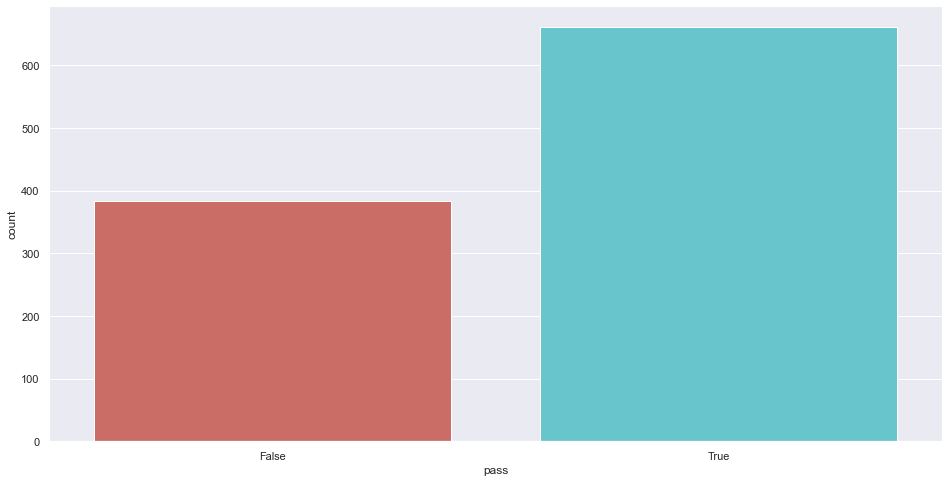

In [63]:
sns.countplot(x="pass",data=students_final,palette="hls")

In [64]:
LogReg=LogisticRegression()
y=students_dummies["pass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
LogReg.fit(X,y)
print("mean accuracy:" + str(round(LogReg.score(X,y),2)))

mean accuracy:0.92


In [65]:
Log_predicted = LogReg.predict(X_test)
print(classification_report(y_test,Log_predicted))

              precision    recall  f1-score   support

       False       0.87      0.92      0.89        98
        True       0.95      0.91      0.93       163

    accuracy                           0.92       261
   macro avg       0.91      0.92      0.91       261
weighted avg       0.92      0.92      0.92       261



- for all students who classified "PASS", 96 percent was correct
- for all students who were actually "PASS", 96  percent was classified correctly

- Lets see the predicted classes, and hilight incorrect predictions:

In [66]:
LogPredections=pd.DataFrame(list(zip(y_test,Log_predicted)),columns=["Actual","Predicted"])
LogPredections.style.apply(lambda x: ["background: yellow" if v != x.iloc[0] else "" for v in x], axis = 1)

,Actual,Predicted
0,True,True
1,True,False
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,False
8,True,True
9,True,True
